In [42]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

#Data Collection and Analysis

In [3]:
dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [4]:
dataset.shape

(100000, 9)

In [5]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64



*   0 --> Non_Diabetic
*   1 --> Diabetic



In [8]:
#checking for NULL value
dataset.isnull().sum()
#So there is no null value

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
#As it is under Sampled dataset so we have to maintain the number between both type of outcome
non_diabetic = dataset[dataset.diabetes == 0]
diabetic = dataset[dataset.diabetes == 1]

In [10]:
non_diabetic.shape

(91500, 9)

In [11]:
diabetic.shape

(8500, 9)

In [12]:
updated_non_diabetic = non_diabetic.sample(n=10000)

In [13]:
#Now concatenate the 2 dataframes for having a new Dataset with normal distribution
new_dataset = pd.concat([updated_non_diabetic , diabetic] , axis = 0)

In [14]:
new_dataset.shape

(18500, 9)

In [15]:
new_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3840,Male,62.0,0,0,No Info,24.37,6.6,100,0
82601,Male,48.0,0,0,No Info,33.96,3.5,126,0
21656,Female,32.0,0,0,No Info,27.32,6.6,200,0
41293,Female,62.0,0,0,never,25.32,3.5,130,0
17661,Male,50.0,0,0,current,17.40,6.5,80,0


In [16]:
new_dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1
99979,Female,61.0,0,0,current,30.11,6.2,240,1


In [17]:
#Handling Duplicates
duplicate_rows_data = new_dataset[new_dataset.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_data.shape[0])
#Delete the duplicates
new_dataset = new_dataset.drop_duplicates()

Number of duplicate rows :  80


In [18]:
#Counting the number of unique Values in every column
for column in new_dataset.columns:
  distinct_val = len(new_dataset[column].unique())
  print(f"{column}: {distinct_val} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 3388 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [19]:
#Removing the unnecessary data
new_dataset = new_dataset[new_dataset['gender'] != 'Other']

#Histogram of Age

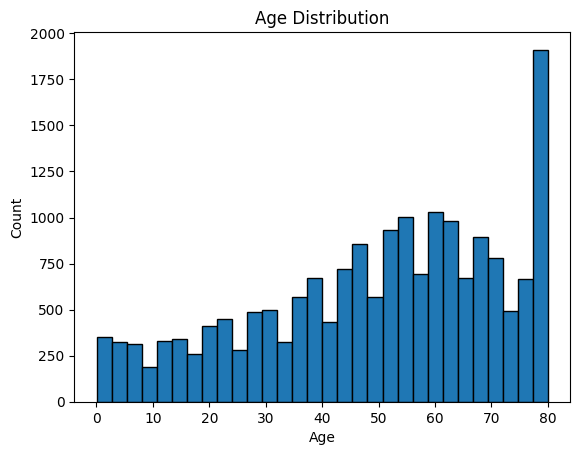

In [20]:
# Histogram for age
plt.hist(new_dataset['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

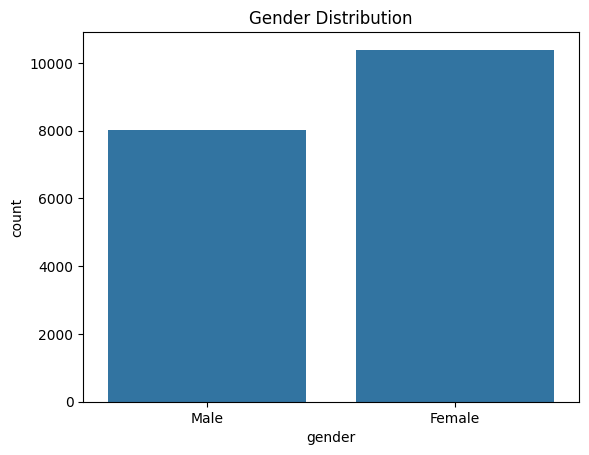

In [21]:
# Bar plot for gender
sns.countplot(x='gender', data=new_dataset)
plt.title('Gender Distribution')
plt.show()

<ipython-input-22-956cefa808fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset['bmi'], bins=30)


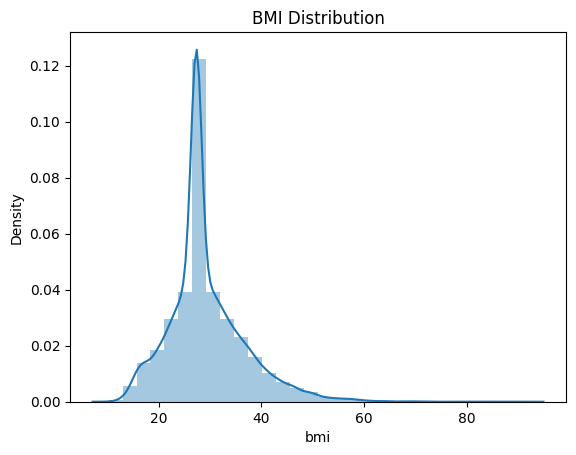

In [22]:
# Distribution plot for BMI
sns.distplot(new_dataset['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

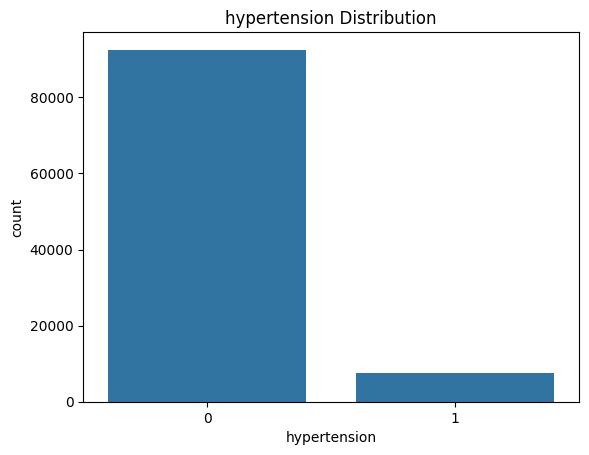

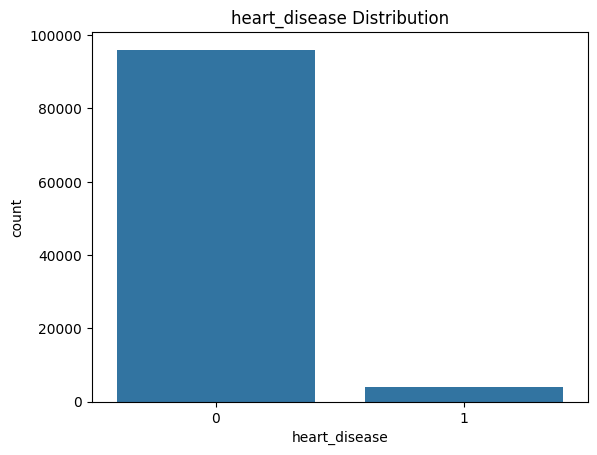

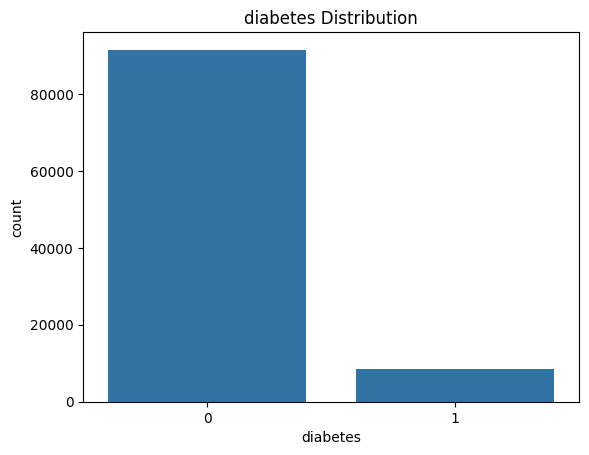

In [23]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=dataset)
    plt.title(f'{col} Distribution')
    plt.show()

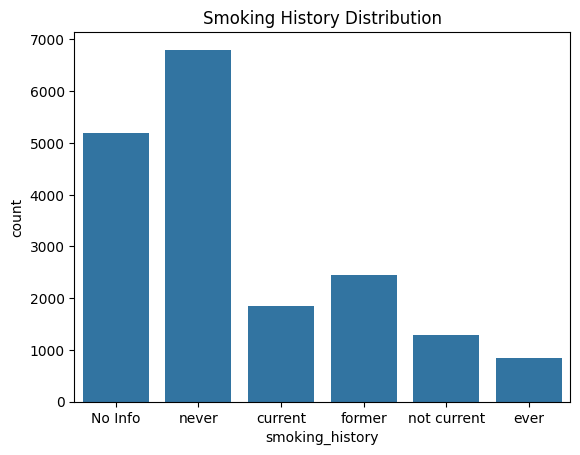

In [24]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=new_dataset)
plt.title('Smoking History Distribution')
plt.show()

#Data Preparation & Correlation

In [25]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
new_dataset['smoking_history'] = new_dataset['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(new_dataset['smoking_history'].value_counts())

non-smoker     12000
past_smoker     4575
current         1843
Name: smoking_history, dtype: int64


In [26]:
data = new_dataset.copy()

#Encoding

In [27]:
def perform_one_hot_encoding(new_dataset, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(new_dataset[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    new_dataset = pd.concat([new_dataset.drop(column_name, axis=1), dummies], axis=1)

    return new_dataset

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

#Correlation Matrix

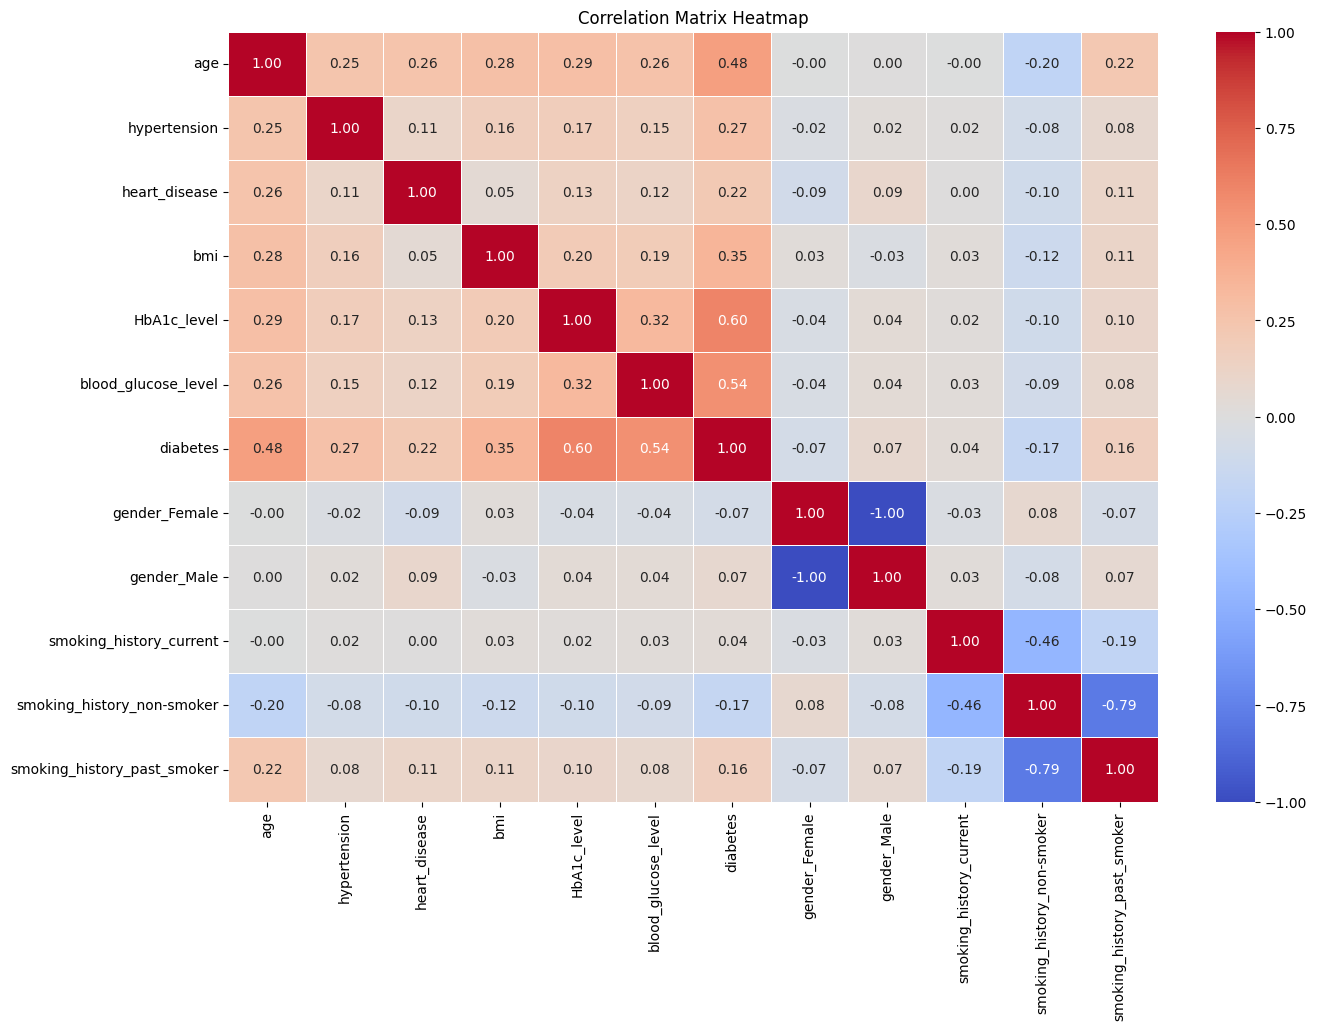

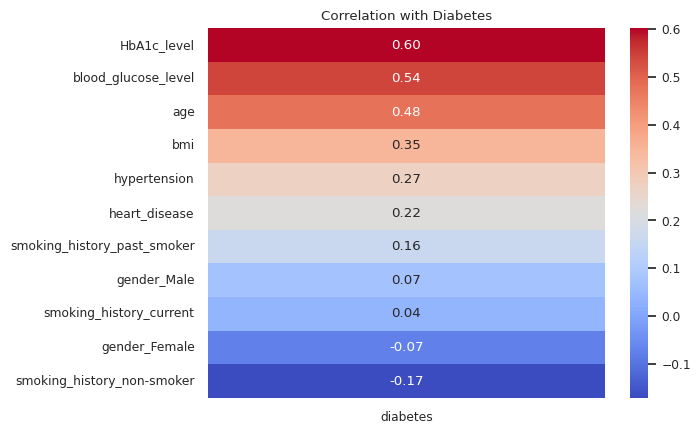

In [28]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [29]:
#Separating two different columns
X = data.drop(columns = 'diabetes', axis = 1)
Y = data['diabetes']

In [30]:
print(X.shape)
print(Y.shape)

(18418, 11)
(18418,)


In [31]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
3840,62.0,0,0,24.37,6.6,100,0,1,0,1,0
82601,48.0,0,0,33.96,3.5,126,0,1,0,1,0
21656,32.0,0,0,27.32,6.6,200,1,0,0,1,0
41293,62.0,0,0,25.32,3.5,130,1,0,0,1,0
17661,50.0,0,0,17.40,6.5,80,0,1,1,0,0


#Data Standardization

In [32]:
#Standardize the data
scaler = StandardScaler()
scaler.fit(X)

#Now we get the standardize data
standardize_data = scaler.transform(X)
X = standardize_data
Y = data['diabetes']

In [33]:
print(X)

[[ 0.56460827 -0.40832587 -0.30249251 ... -0.33345398  0.731323
  -0.57488429]
 [-0.07804675 -0.40832587 -0.30249251 ... -0.33345398  0.731323
  -0.57488429]
 [-0.81250962 -0.40832587 -0.30249251 ... -0.33345398  0.731323
  -0.57488429]
 ...
 [ 0.51870434 -0.40832587 -0.30249251 ... -0.33345398  0.731323
  -0.57488429]
 [ 0.38099255  2.44902437 -0.30249251 ... -0.33345398  0.731323
  -0.57488429]
 [ 0.51870434 -0.40832587 -0.30249251 ...  2.99891462 -1.36738486
  -0.57488429]]


In [34]:
print(Y)

3840     0
82601    0
21656    0
41293    0
17661    0
        ..
99935    1
99938    1
99957    1
99962    1
99979    1
Name: diabetes, Length: 18418, dtype: int64


#Train and Test Split

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = .2 , stratify=Y , random_state = 2)

In [36]:
print(X_train.shape , X_test.shape , Y_train.shape )

(14734, 11) (3684, 11) (14734,)


#Training the Model

**1.Training with SVM Model**

In [37]:
model = svm.SVC(kernel = 'linear')

In [38]:
model.fit(X_train , Y_train)

SVC(kernel='linear')

Model Evaluation

In [39]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)
print("The Training Data accuracy using SVM is : ", training_data_accuracy*100,"%")

The Training Data accuracy using SVM is :  88.65209719017238 %


In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)
print("The Test Data accuracy using SVM is : ", test_data_accuracy*100,"%")

The Test Data accuracy using SVM is :  87.97502714440824 %


**2.Training with Logistic RRegression**

In [43]:
classifier = LogisticRegression()

In [44]:
classifier.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

In [47]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)
print("The Training Data accuracy using Logistic Regression is : ", training_data_accuracy*100,"%")

The Training Data accuracy using Logistic Regression is :  88.56386588842133 %


In [48]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)
print("The Test Data accuracy using Logistic Regression is : ", test_data_accuracy*100,"%")

The Test Data accuracy using Logistic Regression is :  87.81216069489685 %


#Making a predictive System

In [54]:
X_new = X_test[5]
X_new = X_new.reshape(1, -1)
prediction = model.predict(X_new)

if(prediction[0]==0):
  print("The patient is Non Diabetic!!!")
else:
  print("The patient is DIABETIC!!!!!!!!!")

The patient is Non Diabetic!!!
